In [2]:
import numpy as np
import networkx as nx
import pandas as pd
from datetime import datetime
import dynetx as dn
from tqdm import tqdm
import pickle
import csv

C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\computation\expressions.py:21: UserWarning: Pandas requires version '2.8.4' or newer of 'numexpr' (version '2.7.3' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED
C:\Users\wyw25\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


In [2]:
import scipy.stats as sp
import matplotlib.pyplot as plt 
import networkx.algorithms.community as nxcom
import scipy
import powerlaw
from NEMtropy import UndirectedGraph, DirectedGraph
from NEMtropy.network_functions import build_adjacency_from_edgelist
from NEMtropy import matrix_generator
import os
import re
from os import path
import matplotlib.ticker as ticker

SystemError: initialization of _internal failed without raising an exception

## Step1: Load the dictionary of the networks, or LCC networks by days for calculation

In [3]:
with open('Network_dict.pkl', 'rb') as fp:
    Network = pickle.load(fp)

## Step2: Simple visualization for the community at the beginning

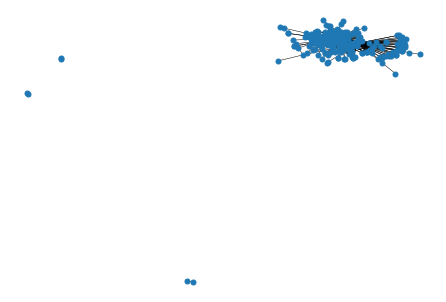

In [5]:
nx.draw(Network['2018-02-12'], pos=nx.spring_layout(Network['2018-02-12'],k=0.15), node_size=25, width=0.5, with_labels=False)

## Step3: The basic functions for network properties calculation

In [16]:
# calculate 4 centrality measures
# degree centrality
# closness centrality
# betweeness centrality
# eigenvector

def calcenmeasures(network):     
    degree_cen = nx.degree_centrality(network)   
    between_cen = nx.betweenness_centrality(network)    
    close_cen = nx.closeness_centrality(network)
    try:
        eigen_cen = nx.eigenvector_centrality(network)
    except:
        eigen_cen = {}
        print('not enough data')
    
    return degree_cen, between_cen, close_cen, eigen_cen

In [17]:
# define the function computing coefficients
# avergage clustering
# assortativity
def calcoe(network):
    avclustering=nx.average_clustering(network)
    assortativity=nx.degree_assortativity_coefficient(network)
    
    return avclustering,assortativity

In [808]:
# swtich dic to array
def switchtoarray(dic):
    arr=[]
    for d in dic:
        arr.append(np.asarray([i for i in d.values().values()])) 
        
    return arr  

In [620]:
# the plot of 4 centrality measures
def plotCoefficient(all_data,time,label,n1,n2):
    Label=[]
    for i in time:
        Label.append(i)
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(12, 12))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            ax[i][j].boxplot(all_data[n])
            ax[i][j].set_xlabel('Time')
            ax[i][j].set_ylabel(label[n])
            ax[i][j].set_xticklabels(Label)
            
    plt.show()

In [20]:
# can output the top result
def gethigh(DIC):
    selectlist=sorted((DIC), key=DIC.get, reverse=True)[:5]
    top=[]
    for i in selectlist:
        top.append(DIC[i])
    print(selectlist)
    print(top)

In [21]:
#plot of 
def plotavecoe(Avclustering,Assortativity,time):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots()
    ax.plot(Avclustering,label='Avergage clustering')
    ax.plot(Assortativity,label='Assortativity')
    ax.legend()
    ax.set_xticks(range(len(file)+1))
    ax.set_xticklabels(Label)
    ax.set_xlabel('Time') 
    ax.set_title('Avergage clustering & Assortativity by time')
    
    plt.show()   

In [22]:
def AvdegreeNN(network,time,n1,n2):
    Label=[]
    for i in time:
        number = re.findall("\d+",i) 
        Label.append(number[0])
    Label.append('Total')
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(18,15))
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            KNN=nx.average_degree_connectivity(network[n])
            X = [i for i in KNN.keys() ]
            Y = [i for i in KNN.values() ]
            ax[i][j].scatter(X,Y)
            ax[i][j].set_xlabel('degree k')
            ax[i][j].set_ylabel('degree knn')
            ax[i][j].set_title(Label[n])
       
    plt.show()

In [804]:
Degree_cen={}
Between_cen={}
Close_cen={}
Eigen_cen={}

for year in tqdm(Dic_lcc.keys()):
    degree_cen, between_cen, close_cen, eigen_cen=calcenmeasures(Dic_lcc[year])
    Degree_cen[year]=degree_cen
    Between_cen[year]=between_cen
    Close_cen[year]=close_cen
    Eigen_cen[year]=eigen_cen

 82%|█████████████████████████████████████████████████████████████▎             | 9/11 [20:36:10<4:34:42, 8241.19s/it]


KeyboardInterrupt: 

In [809]:
Degree_cen_arr=switchtoarray(Degree_cen)
Between_cen_arr=switchtoarray(Between_cen)
Close_cen_arr=switchtoarray(Close_cen)
Eigen_cen_arr=switchtoarray(Eigen_cen)

AttributeError: 'str' object has no attribute 'values'

In [807]:
Degree_cen

{'2018-01-12': {1: 1.0, 2: 1.0},
 '2018-01-25': {1: 0.0297029702970297,
  2: 0.009900990099009901,
  3: 0.19801980198019803,
  4: 0.0891089108910891,
  5: 0.13861386138613863,
  6: 0.019801980198019802,
  7: 0.21782178217821782,
  8: 0.019801980198019802,
  9: 0.0594059405940594,
  10: 0.009900990099009901,
  11: 0.039603960396039604,
  12: 0.04950495049504951,
  13: 0.009900990099009901,
  14: 0.0297029702970297,
  15: 0.36633663366336633,
  16: 0.009900990099009901,
  17: 0.04950495049504951,
  18: 0.0297029702970297,
  19: 0.009900990099009901,
  20: 0.0891089108910891,
  21: 0.0891089108910891,
  22: 0.0594059405940594,
  23: 0.019801980198019802,
  24: 0.019801980198019802,
  25: 0.019801980198019802,
  26: 0.009900990099009901,
  27: 0.039603960396039604,
  28: 0.019801980198019802,
  29: 0.009900990099009901,
  30: 0.009900990099009901,
  31: 0.039603960396039604,
  32: 0.039603960396039604,
  33: 0.009900990099009901,
  34: 0.009900990099009901,
  35: 0.019801980198019802,
  36

In [29]:
all_data=[Degree_cen_arr,Between_cen_arr,Close_cen_arr,Eigen_cen_arr]

## Step4: The basic functions for network properties calculation

In [51]:
def Basic_Count(Graph):
    # total nodes 
    n_nodes=Graph.number_of_nodes()
    # total edges
    n_edges=Graph.number_of_edges()
    # total density
    n_density=nx.density(Graph)
    # capacity
    n_capacity=G.degree(weight='weight') 
    
    return n_nodes,n_edges,n_density,n_capacity

In [664]:
def Pic_evolution(DIC,label,n1,n2):
    
    fig, ax = plt.subplots(nrows=n1, ncols=n2, figsize=(15, 4))
    
    for i in range(n1):
        for j in range(n2):
            n=i*n2+j
            x, y = zip(*DIC[n]) 
            ax[j].scatter(x,y)
            ax[j].set_xlabel('Time')
            ax[j].set_yscale("log")
            ax[j].set_ylabel(label[n])
            ax[j].xaxis.set_major_locator(ticker.MultipleLocator(400))
            
    plt.show()
    


In [52]:
Nodedic={}
Edgedic={}
Densdic={}
Capacity={}

for dates in Network.keys():
    n_nodes,n_edges,n_density,n_capacity=Basic_Count(Network[dates])
    Nodedic[dates]=n_nodes
    Edgedic[dates]=n_edges
    Densdic[dates]=n_density
    Capacity[dates]=n_capacity

In [613]:
lists1 = sorted(Nodedic.items()) # sorted by key, return a list of tuples
lists2 = sorted(Edgedic.items()) # sorted by key, return a list of tuples
lists3 = sorted(Densdic.items()) # sorted by key, return a list of tuples
evolution=[lists1,lists2,lists3]

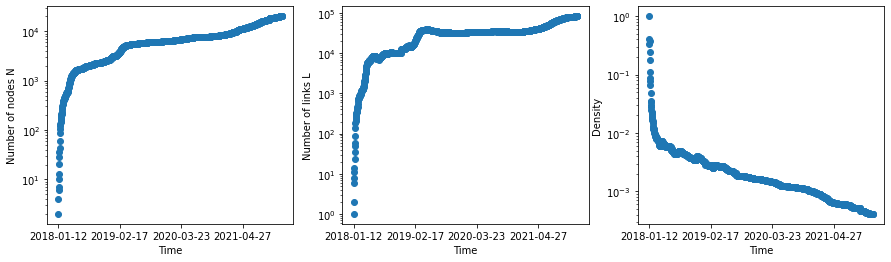

In [665]:
Pic_evolution(evolution,['Number of nodes N','Number of links L','Density'],1,3)


In [830]:
di_capacity['2019-05-06']

DegreeView({1: 247200, 2: 37200, 3: 10734955, 4: 5727000, 5: 7054204, 6: 3000000, 7: 9902309, 9: 175496, 10: 15000, 8: 10000, 11: 1564536, 15: 17372472, 16: 500000, 17: 1758716, 19: 500000, 20: 2468019, 21: 6956268, 22: 2890000, 23: 24830161, 25: 460000, 26: 10000, 27: 364934, 28: 40000, 29: 171809, 30: 80000, 32: 62675, 33: 61575, 24: 11651367, 34: 700000, 35: 700000, 36: 3591008, 37: 400000, 38: 1068486, 39: 180806, 40: 370230, 41: 14506, 42: 2172705, 43: 200000, 44: 701050, 45: 4823758, 47: 49148832, 48: 1526100, 49: 1000000, 50: 490000, 51: 201050, 52: 37117607, 53: 250000, 54: 3194763, 55: 25000, 56: 370000, 57: 200000, 58: 32000, 59: 20000, 60: 70000, 61: 83000, 62: 20000, 63: 17986557, 64: 19000, 65: 1273096, 66: 626404, 67: 137333, 68: 5000, 69: 50000, 71: 1167250, 72: 105000, 73: 100000, 74: 100000, 75: 1470151, 76: 30000, 77: 6000, 78: 222200, 79: 800000, 80: 201150, 81: 550000, 83: 22288, 84: 100000, 86: 300000, 87: 400000, 85: 224150, 88: 320000, 89: 100000, 90: 11050, 82: 

In [823]:
di_capacity=dict(Capacity)

In [828]:
dict(di_capacity['2019-05-06']).values()

dict_values([247200, 37200, 10734955, 5727000, 7054204, 3000000, 9902309, 175496, 15000, 10000, 1564536, 17372472, 500000, 1758716, 500000, 2468019, 6956268, 2890000, 24830161, 460000, 10000, 364934, 40000, 171809, 80000, 62675, 61575, 11651367, 700000, 700000, 3591008, 400000, 1068486, 180806, 370230, 14506, 2172705, 200000, 701050, 4823758, 49148832, 1526100, 1000000, 490000, 201050, 37117607, 250000, 3194763, 25000, 370000, 200000, 32000, 20000, 70000, 83000, 20000, 17986557, 19000, 1273096, 626404, 137333, 5000, 50000, 1167250, 105000, 100000, 100000, 1470151, 30000, 6000, 222200, 800000, 201150, 550000, 22288, 100000, 300000, 400000, 224150, 320000, 100000, 11050, 96097, 101000, 27000, 1482855, 1400000, 52050, 45150, 176376, 1431150, 910000, 5600, 10000, 102703, 1193434, 210000, 10000, 245459, 978000, 5000, 110655, 948698, 800000, 90000, 1000000, 414000, 100000, 30000, 47000, 50000, 700050, 50000, 23333, 500000, 160000, 767901, 40000, 20000, 50000, 50000, 2000, 176000, 31050, 1200

No handles with labels found to put in legend.


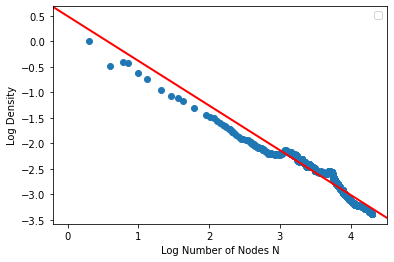

In [682]:
m=list(Nodedic.values())
n=list(Densdic.values())

plt.xlabel("Log Number of Nodes N")
plt.ylabel("Log Density")
plt.scatter(np.log10(m), np.log10(n))


b, a = np.polyfit(np.log10(m), np.log10(n), deg=1)
plt.axline(xy1=(0, a), slope=b, color='r',lw=2)
plt.legend()

plt.show()


## Capacity

In [874]:
def Fraction_top_nodes(dic,total_capacity,percentage):
    
    capacity_level= total_capacity*percentage 
    capacitycount=0
    
    for i in range(len(dic)):
        capacitycount=capacitycount+dic[i][1]
        if capacitycount>capacity_level:
            return (i+1)/len(dic)
  

In [875]:
capacity_level50= {}
capacity_level80= {}
capacity_level90= {}
capacity_level95= {}
capacity_level99= {}
T_capacity={}

for dates in tqdm(dict(Capacity).keys()):
    capacitydic=dict(Capacity[dates])
    # set them a qeruence from top to end
    Sort_capacity=sorted(capacitydic.items(), key=lambda x:x[1],reverse=True)
    # calculate total capacitie
    total_capacity=sum(capacitydic.values())
    T_capacity[dates]=total_capacity
    # count fraction of top nodes
    
    capacity_level50[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.5)
    capacity_level80[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.8)
    capacity_level90[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.9)
    capacity_level95[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.95)
    capacity_level99[dates]= Fraction_top_nodes(Sort_capacity,total_capacity,0.99)


100%|█████████████████████████████████████████████████████████████████████████████| 1456/1456 [03:12<00:00,  7.58it/s]


In [876]:
capacity_level99

{'2018-01-12': 1.0,
 '2018-01-14': 1.0,
 '2018-01-15': 0.8333333333333334,
 '2018-01-16': 0.8571428571428571,
 '2018-01-17': 0.8,
 '2018-01-18': 0.7692307692307693,
 '2018-01-19': 0.8095238095238095,
 '2018-01-20': 0.6896551724137931,
 '2018-01-21': 0.6944444444444444,
 '2018-01-22': 0.6976744186046512,
 '2018-01-23': 0.7,
 '2018-01-24': 0.6629213483146067,
 '2018-01-25': 0.6442307692307693,
 '2018-01-26': 0.6949152542372882,
 '2018-01-27': 0.6923076923076923,
 '2018-01-28': 0.6805555555555556,
 '2018-01-29': 0.6774193548387096,
 '2018-01-30': 0.6941176470588235,
 '2018-01-31': 0.6971428571428572,
 '2018-02-01': 0.6878306878306878,
 '2018-02-02': 0.6785714285714286,
 '2018-02-03': 0.6714975845410628,
 '2018-02-04': 0.6682464454976303,
 '2018-02-05': 0.6621621621621622,
 '2018-02-06': 0.6497890295358649,
 '2018-02-07': 0.6245210727969349,
 '2018-02-08': 0.6258992805755396,
 '2018-02-09': 0.5927152317880795,
 '2018-02-10': 0.5552238805970149,
 '2018-02-11': 0.5526315789473685,
 '2018-02-

No handles with labels found to put in legend.


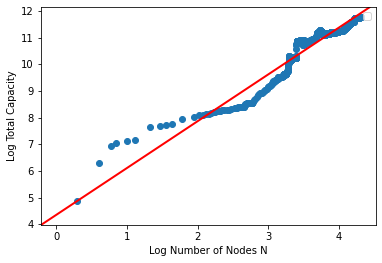

In [877]:
m=list(Nodedic.values())
n=list(T_capacity.values())

plt.xlabel("Log Number of Nodes N")
plt.ylabel("Log Total Capacity")
plt.scatter(np.log10(m), np.log10(n))


b, a = np.polyfit(np.log10(m), np.log10(n), deg=1)
plt.axline(xy1=(0, a), slope=b, color='r',lw=2)
plt.legend()

plt.show()


In [1]:
fig = plt.figure( figsize=(6, 6))
x=list(Nodedic.values())
y1=list(capacity_level99.values())
y2=list(capacity_level95.values())
y3=list(capacity_level90.values())
y4=list(capacity_level80.values())
y5=list(capacity_level50.values())


plt.scatter(x, y1,label='99% Capacity')
plt.scatter(x, y2,label='95% Capacity')
plt.scatter(x, y3,label='90% Capacity')
plt.scatter(x, y4,label='80% Capacity')
plt.scatter(x, y5,label='50% Capacity')
plt.xscale("log")
plt.ylim(0,1)

plt.xlabel("Number of Nodes N")
plt.ylabel("Fraction of Top Nodes")

plt.legend(loc='upper right')

NameError: name 'plt' is not defined

In [879]:
# Gini coefficient
def Gini_coefficient(C):
    N=len(C)
    numerator=0
    divider=0
    for i in range(N):
        for j in range(N):
            numerator=numerator+abs(C[i]-C[j])
        divider=divider+C[i]
    ind=numerator/(divider*2*N)
    
    return ind

In [881]:
# run for calculation
capacity_gini={}

for dates in tqdm(dict(Capacity).keys()):
    capacitydic=dict(Capacity[dates])
    capacity_gini[dates]=Gini_coefficient(list(capacitydic.values()))

100%|███████████████████████████████████████████████████████████████████████████| 1456/1456 [3:59:21<00:00,  9.86s/it]


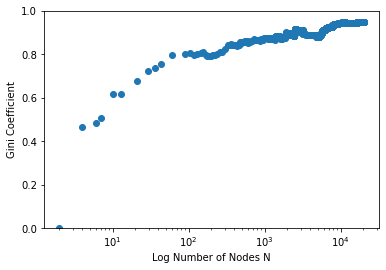

In [882]:
m=list(Nodedic.values())
n=list(capacity_gini.values())

plt.xlabel("Log Number of Nodes N")
plt.ylabel("Gini Coefficient")
plt.scatter(m, n)
plt.xscale("log")
plt.ylim(0,1)

plt.show()

## Step5: The largest connected component

In [27]:
def Lagest_c_c(G):
    largest_cc = max(nx.connected_components(G), key=len)
    S = [G.subgraph(c).copy() for c in nx.connected_components(G)]
    
    return S[0]

In [751]:
Dic_lcc={}
for date in ['2018-01-12','2018-01-25','2018-03-02','2018-03-31','2018-09-21', '2019-01-29','2019-12-20', '2021-01-05','2021-05-24','2021-08-26','2021-11-25']:
    lcc=Lagest_c_c(Network[date])
    Dic_lcc[date]=lcc

In [752]:
Dic_lcc

{'2018-01-12': <networkx.classes.graph.Graph at 0x1d8161a02b0>,
 '2018-01-25': <networkx.classes.graph.Graph at 0x1d8161a0df0>,
 '2018-03-02': <networkx.classes.graph.Graph at 0x1d7efcff970>,
 '2018-03-31': <networkx.classes.graph.Graph at 0x1d830cf9b50>,
 '2018-09-21': <networkx.classes.graph.Graph at 0x1d83d37ff10>,
 '2019-01-29': <networkx.classes.graph.Graph at 0x1d8161a9910>,
 '2019-12-20': <networkx.classes.graph.Graph at 0x1d8161a9a00>,
 '2021-01-05': <networkx.classes.graph.Graph at 0x1d83b1d94c0>,
 '2021-05-24': <networkx.classes.graph.Graph at 0x1d8161a99d0>,
 '2021-08-26': <networkx.classes.graph.Graph at 0x1d83b1c7e80>,
 '2021-11-25': <networkx.classes.graph.Graph at 0x1d81618bdc0>}

In [36]:
G=Network['2018-03-25']
largest_cc = max(nx.connected_components(G), key=len)
S = [G.subgraph(c).copy() for c in nx.connected_components(G)]

In [37]:
adjacency_matrix = nx.to_numpy_matrix(S[0],dtype=np.bool)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_16108/179930967.py:1: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(S[0],dtype=np.bool)


In [38]:
adjmat=(adjacency_matrix*1).tolist()

In [39]:
with open("mat2018_03_25.csv", "w", newline="") as f:
    writer = csv.writer(f)
    writer.writerows(adjmat)

C:\Users\wyw25\anaconda3\lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:33772): GLib-GIO-WARNING **: 00:13:44.043: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.29.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


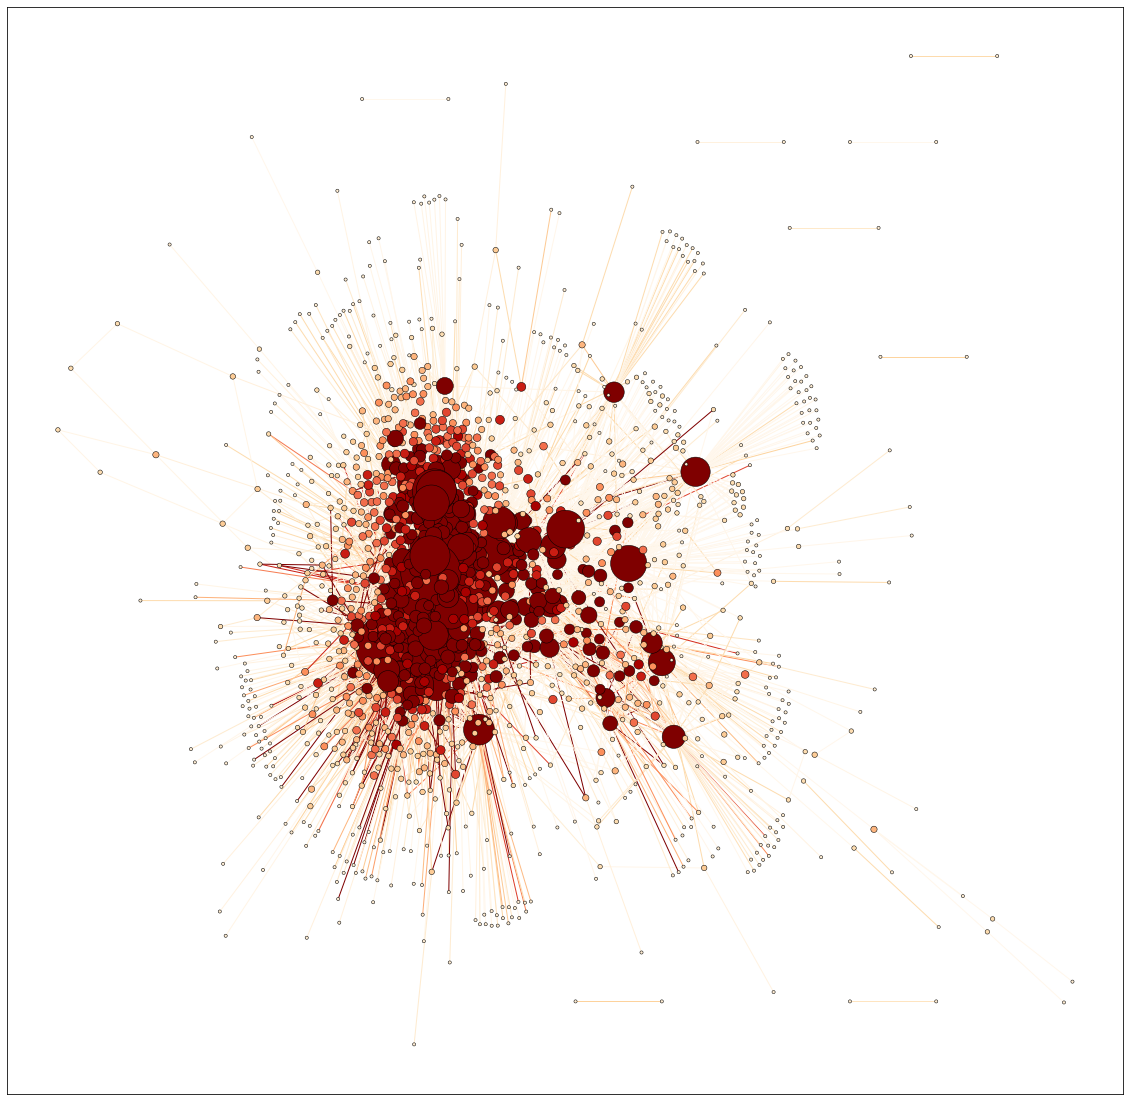

In [34]:
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

C:\Users\wyw25\anaconda3\lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:29052): GLib-GIO-WARNING **: 00:13:53.017: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.29.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


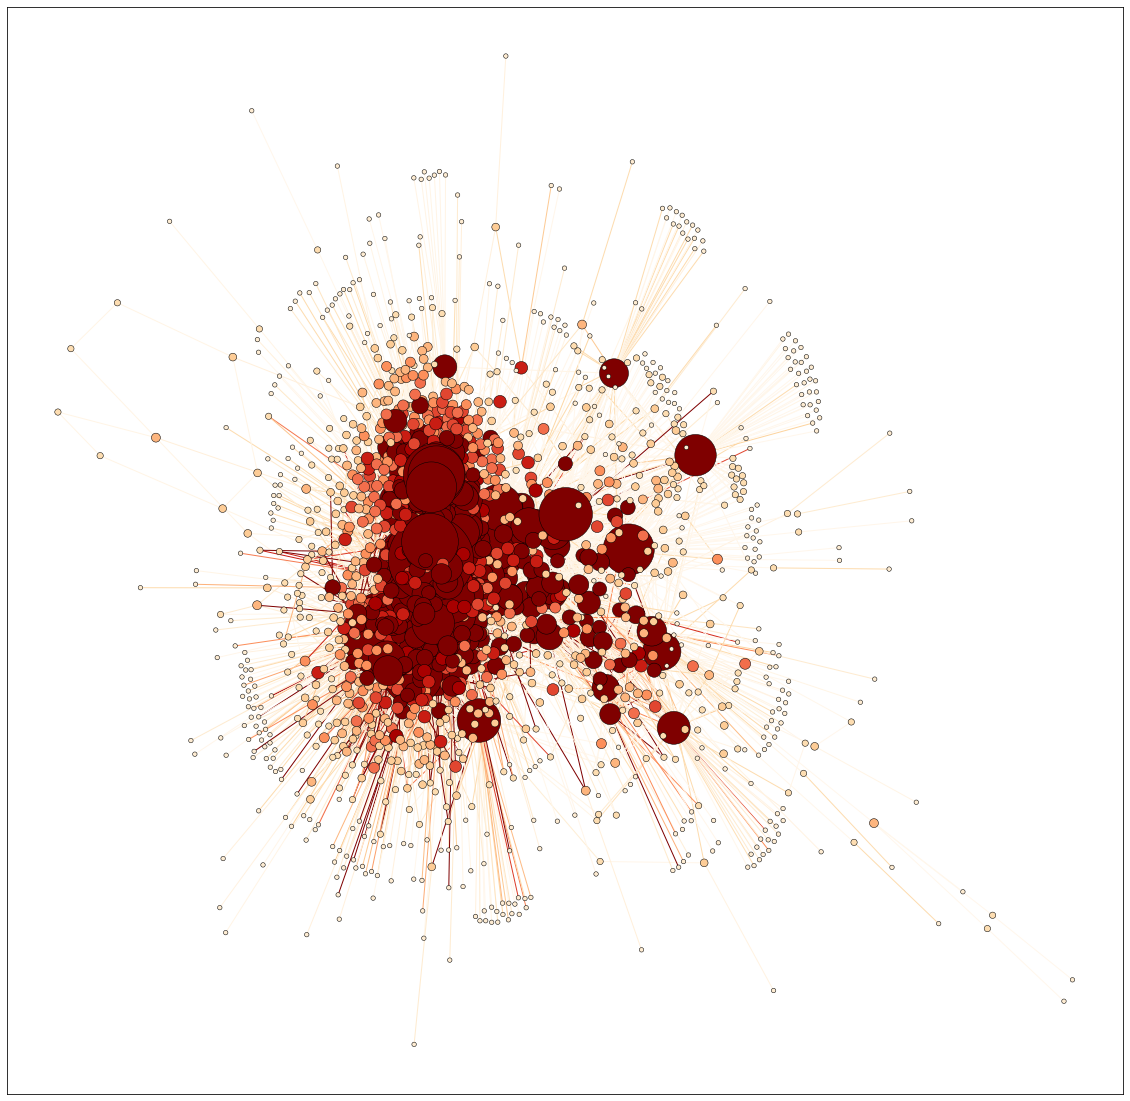

In [35]:
G=S[0]
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 20 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

In [736]:
len(S[1])

2

In [739]:
for i in range(len(S)):

    print(len(S[i]))

15401
2
2
2
2
2
2
2
2
2
3
2
2
2
2
5
2
3
2
2
2
2
2
2
2
2
2
2
3
3
3
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
3
2
2
2
2
2
2
2
2
2
2
2
2
2
2


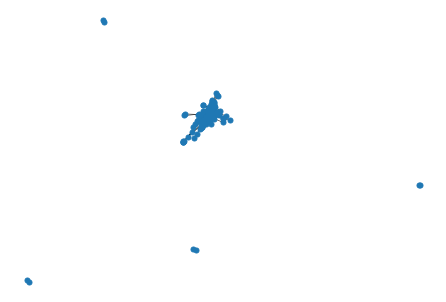

In [264]:
nx.draw(G, node_size=25, width=0.5, with_labels=False)

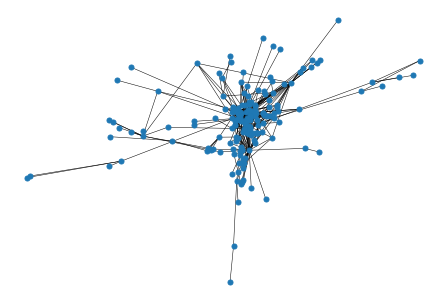

In [265]:
nx.draw(S[0], node_size=25, width=0.5, with_labels=False)

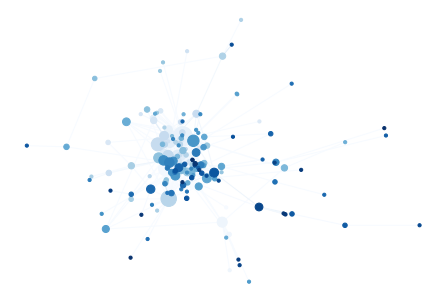

In [295]:
pos = nx.spring_layout(S[0], seed=6300) 
d = dict(S[0].degree)
colors = range(380)
edges,weights = zip(*nx.get_edge_attributes(S[0],'weight').items())

nx.draw(S[0],  node_color=range(181), edgelist=edges, edge_color=norm, node_size=[v * 10 for v in d.values()], cmap=plt.cm.Blues,edge_cmap=plt.cm.Blues)
plt.show()

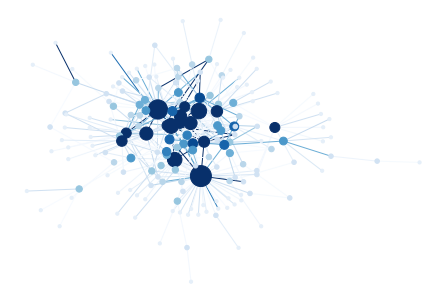

In [337]:
pos = nx.nx_agraph.graphviz_layout(S[0], prog="neato")
#pos = nx.nx_agraph.graphviz_layout(S[0], prog="neato", args="")
#pos = nx.kamada_kawai_layout(S[0])
d = dict(S[0].degree)
weights = nx.get_edge_attributes(S[0],'weight')

nx.draw(S[0], pos=pos, node_color=[v * 10 for v in d.values()], width=1.0, edge_color=weights.values(), node_size=[v * 10 for v in d.values()], 
        vmin=1,vmax=100,cmap=plt.cm.Blues,edge_cmap=plt.cm.Blues,edge_vmin=1,edge_vmax=1000000)
plt.show()

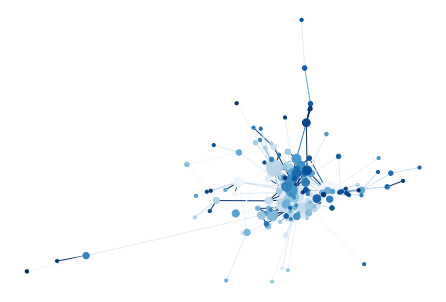

In [316]:
pos = nx.spring_layout(S[0], seed=63) 
d = dict(S[0].degree)
weights = nx.get_edge_attributes(S[0],'weight')

nx.draw(S[0], pos=pos, node_color=range(181), edgelist=edges,width=1.0, edge_color=weights.values(), node_size=[v * 10 for v in d.values()], cmap=plt.cm.Blues,edge_cmap=plt.cm.Blues,edge_vmin=1,edge_vmax=100000)
plt.show()

dot

neato

fdp

sfdp

circo

twopi

nop

nop2

osage

patchwork

Writing Layout Plugins

C:\Users\wyw25\anaconda3\lib\site-packages\pygraphviz\agraph.py:1405: RuntimeWarning: 
(process:44604): GLib-GIO-WARNING **: 16:04:47.767: Unexpectedly, UWP app `3138AweZip.AweZip_1.4.29.0_x64__ffd303wmbhcjt' (AUMId `3138AweZip.AweZip_ffd303wmbhcjt!App') supports 167 extensions but has no verbs

(process:44604): GLib-GIO-WARNING **: 16:04:47.907: Unexpectedly, UWP app `Microsoft.ScreenSketch_11.2305.26.0_x64__8wekyb3d8bbwe' (AUMId `Microsoft.ScreenSketch_8wekyb3d8bbwe!App') supports 29 extensions but has no verbs

(process:44604): GLib-GIO-WARNING **: 16:04:47.958: Unexpectedly, UWP app `Clipchamp.Clipchamp_2.7.9.0_neutral__yxz26nhyzhsrt' (AUMId `Clipchamp.Clipchamp_yxz26nhyzhsrt!App') supports 41 extensions but has no verbs

  warnings.warn(b"".join(errors).decode(self.encoding), RuntimeWarning)


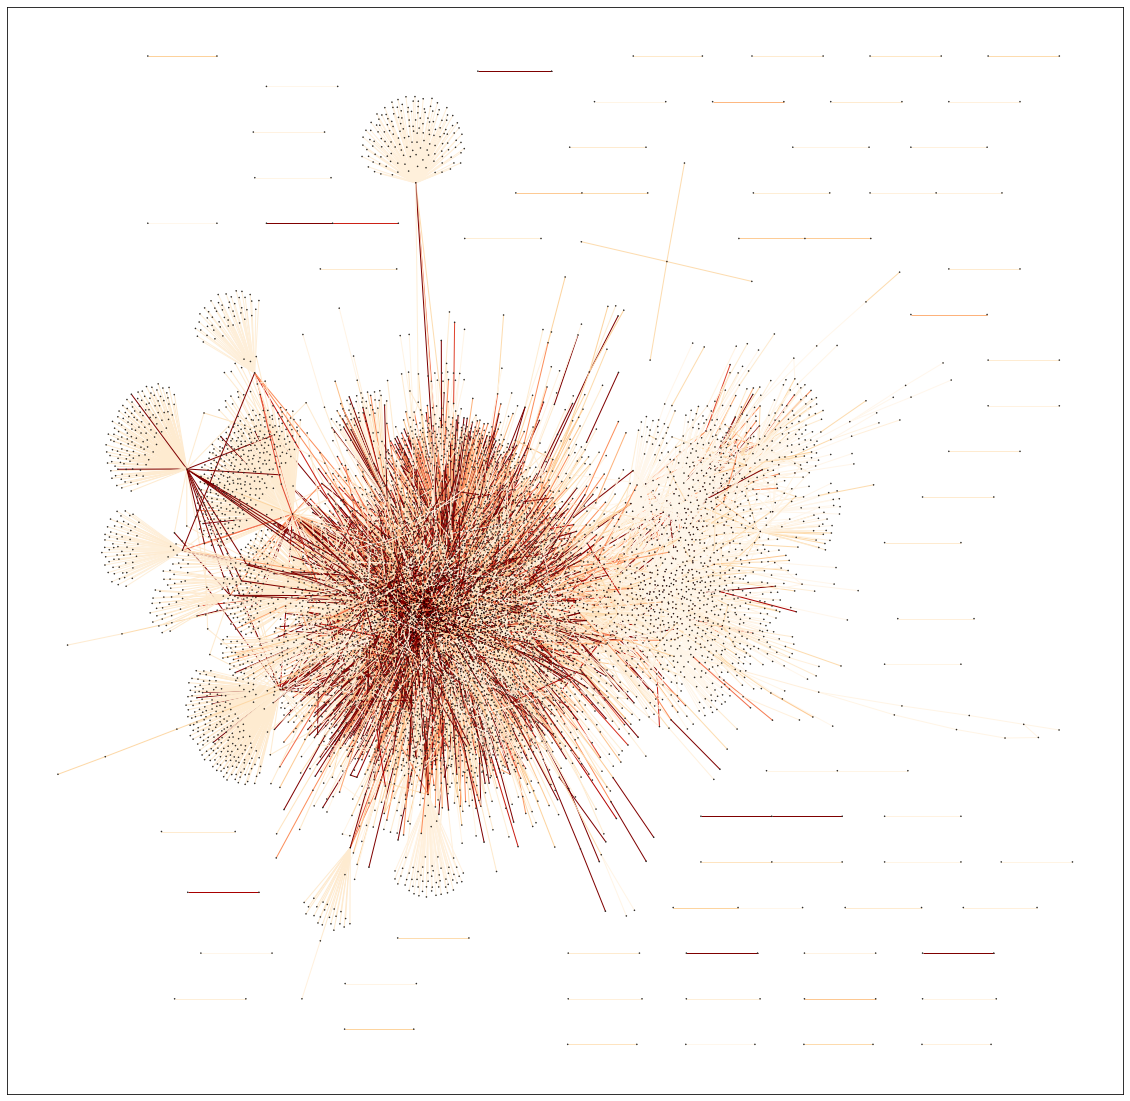

In [797]:
G=Network['2021-01-25']
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(20,20)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=1, vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

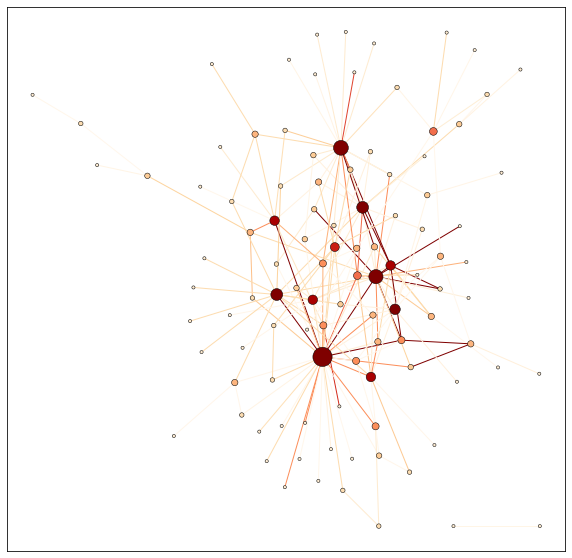

In [688]:
G=Network['2018-01-25']
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=0.5,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 10 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

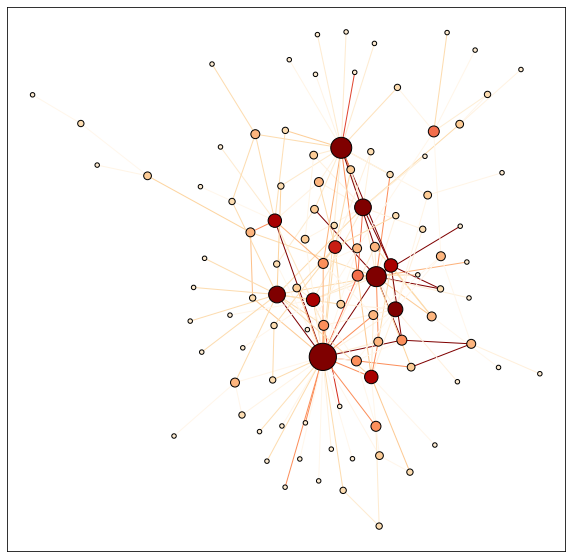

In [694]:
G=S[0]
pos = nx.nx_agraph.graphviz_layout(G, prog="sfdp")
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=1,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 20 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

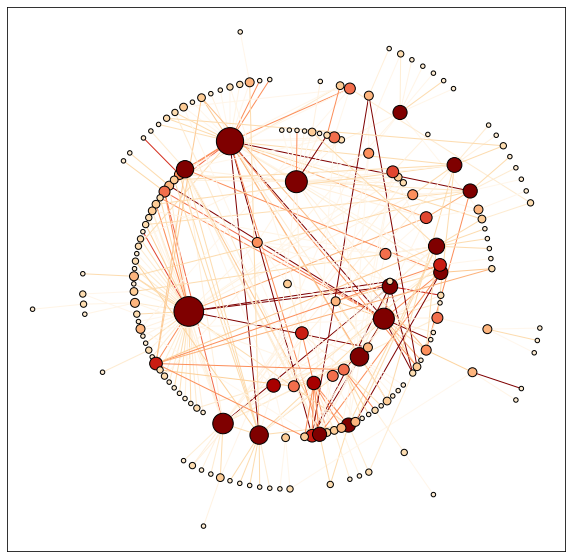

In [485]:
G=S[0]
pos = nx.nx_agraph.graphviz_layout(G, prog="twopi",root=0)
#pos = nx.spring_layout(G, k=None, pos=None, fixed=None, iterations=5, threshold=0.0000001, weight='weight', scale=5, center=None, dim=2, seed=None)
d = dict(G.degree)
weights = nx.get_edge_attributes(G,'weight')
plt.figure(3,figsize=(10,10)) 
nx.draw_networkx_nodes(G,pos=pos,linewidths=1,edgecolors='black',node_color=[v * 10 for v in d.values()],node_size=[v * 20 for v in d.values()], vmin=1,vmax=100,cmap=plt.cm.OrRd)
nx.draw_networkx_edges(G,pos=pos,width=1,connectionstyle="arc6,rad=0.2" ,edge_color=weights.values(),edge_cmap=plt.cm.OrRd,edge_vmin=1,edge_vmax=1000000)


plt.show()

In [ ]:
G = nx.star_graph(20)
pos = nx.spring_layout(G, seed=63)  # Seed layout for reproducibility
colors = range(20)
options = {
    "node_color": "#A0CBE2",
    "edge_color": colors,
    "width": 4,
    "edge_cmap": plt.cm.Blues,
    "with_labels": False,
}
nx.draw(G, pos, **options)
plt.show()

In [488]:
for i in ['2018-01-12', '2018-01-25', '2018-03-02', '2018-03-31', '2018-09-21', '2019-01-29', '2019-12-20', '2021-01-05', '2021-05-24', '2021-08-26', '2021-11-25']:
    print(Nodedic[i])

2
104
506
1000
2250
3302
6345
8641
11922
15659
19479


In [497]:
def Capacity_c(G):
    n_capacity=G.degree(weight='weight') 
    return n_capacity

In [498]:
Capacity={}

for dates in tqdm(Network.keys()):
    n_capacity=Capacity_c(Network[dates])
    Capacity[dates]=n_capacity

100%|███████████████████████████████████████████████████████████████████████████| 1456/1456 [00:00<00:00, 13248.32it/s]


In [496]:
Network['2019-10-31']

'2018-01-12','2018-01-25','2018-03-02','2018-03-31','2018-09-21', '2019-01-29','2019-12-20', '2021-01-05','2021-05-24','2021-08-26','2021-11-25'

In [516]:
from matplotlib import patches
from scipy import io
import numpy as np
from collections import defaultdict
import louvain

C:\Users\wyw25\AppData\Local\Temp/ipykernel_20976/2935340221.py:5: DeprecationWarning: This package has been superseded by the `leidenalg` package and will no longer be maintained. Please upgrade to the `leidenalg` package.
  import louvain


In [789]:
def draw_adjacency_matrix(G, node_order=None, partitions=[], colors=[]):
    """
    - G is a netorkx graph
    - node_order (optional) is a list of nodes, where each node in G
          appears exactly once
    - partitions is a list of node lists, where each node in G appears
          in exactly one node list
    - colors is a list of strings indicating what color each
          partition should be
    If partitions is specified, the same number of colors needs to be
    specified.
    """
    adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)

    #Plot adjacency matrix in toned-down black and white
    fig = plt.figure(figsize=(20, 20)) # in inches
    plt.imshow(adjacency_matrix,
                  cmap="Greys",
                  interpolation="none")
    
    # The rest is just if you have sorted nodes by a partition and want to
    # highlight the module boundaries
    assert len(partitions) == len(colors)
    ax = plt.gca()
    for partition, color in zip(partitions, colors):
        current_idx = 0
        for module in partition:
            ax.add_patch(patches.Rectangle((current_idx, current_idx),
                                          len(module), # Width
                                          len(module), # Height
                                          facecolor="none",
                                          edgecolor=color,
                                          linewidth="1"))
            current_idx += len(module)
            

C:\Users\wyw25\AppData\Local\Temp/ipykernel_20976/1638957180.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


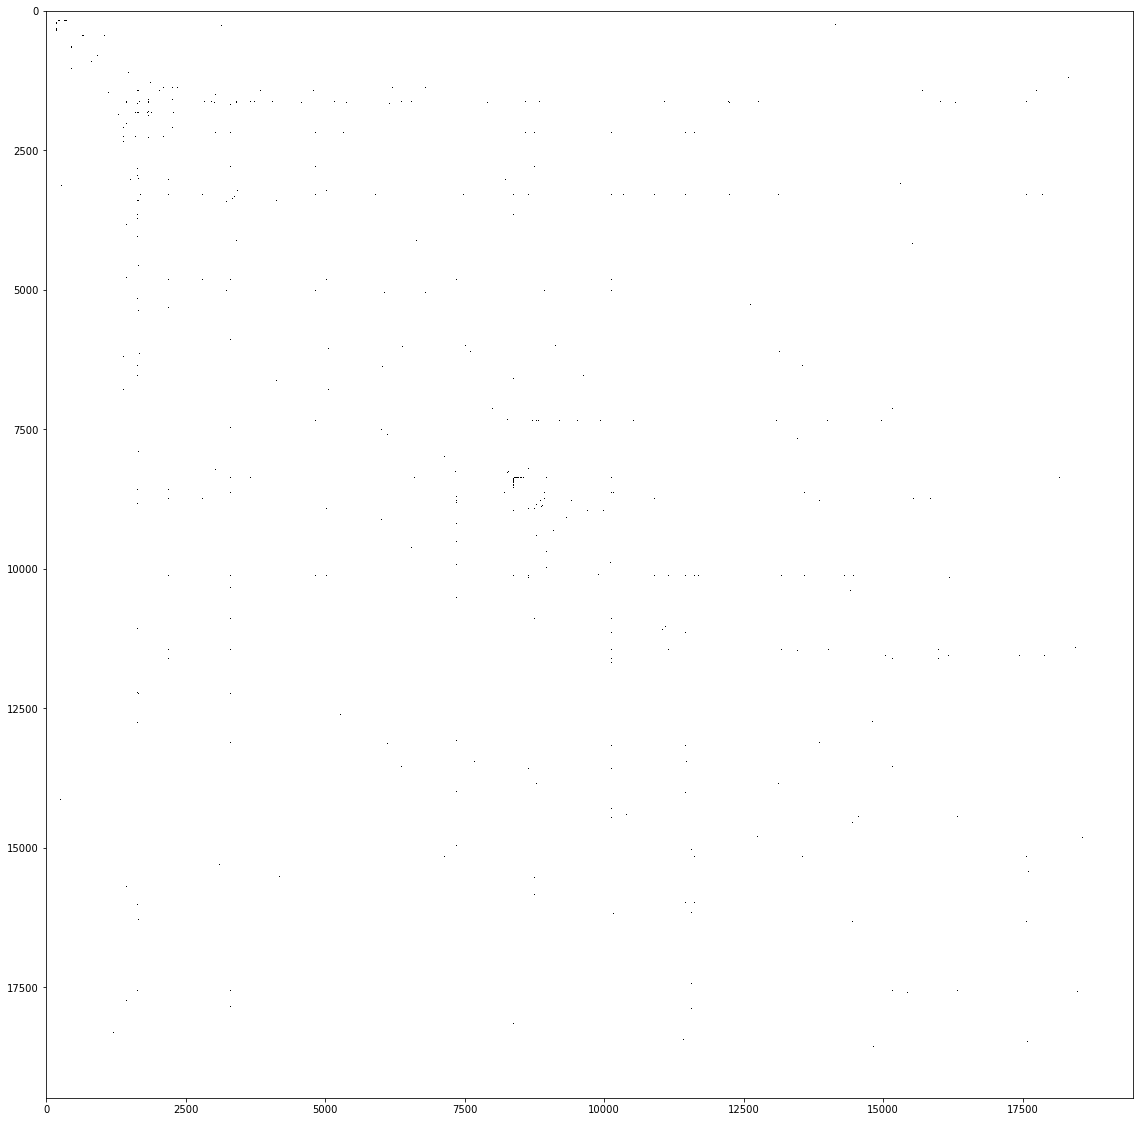

In [794]:
G=Network['2021-11-25']
draw_adjacency_matrix(G)

In [795]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())

C:\Users\wyw25\AppData\Local\Temp/ipykernel_20976/1638957180.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


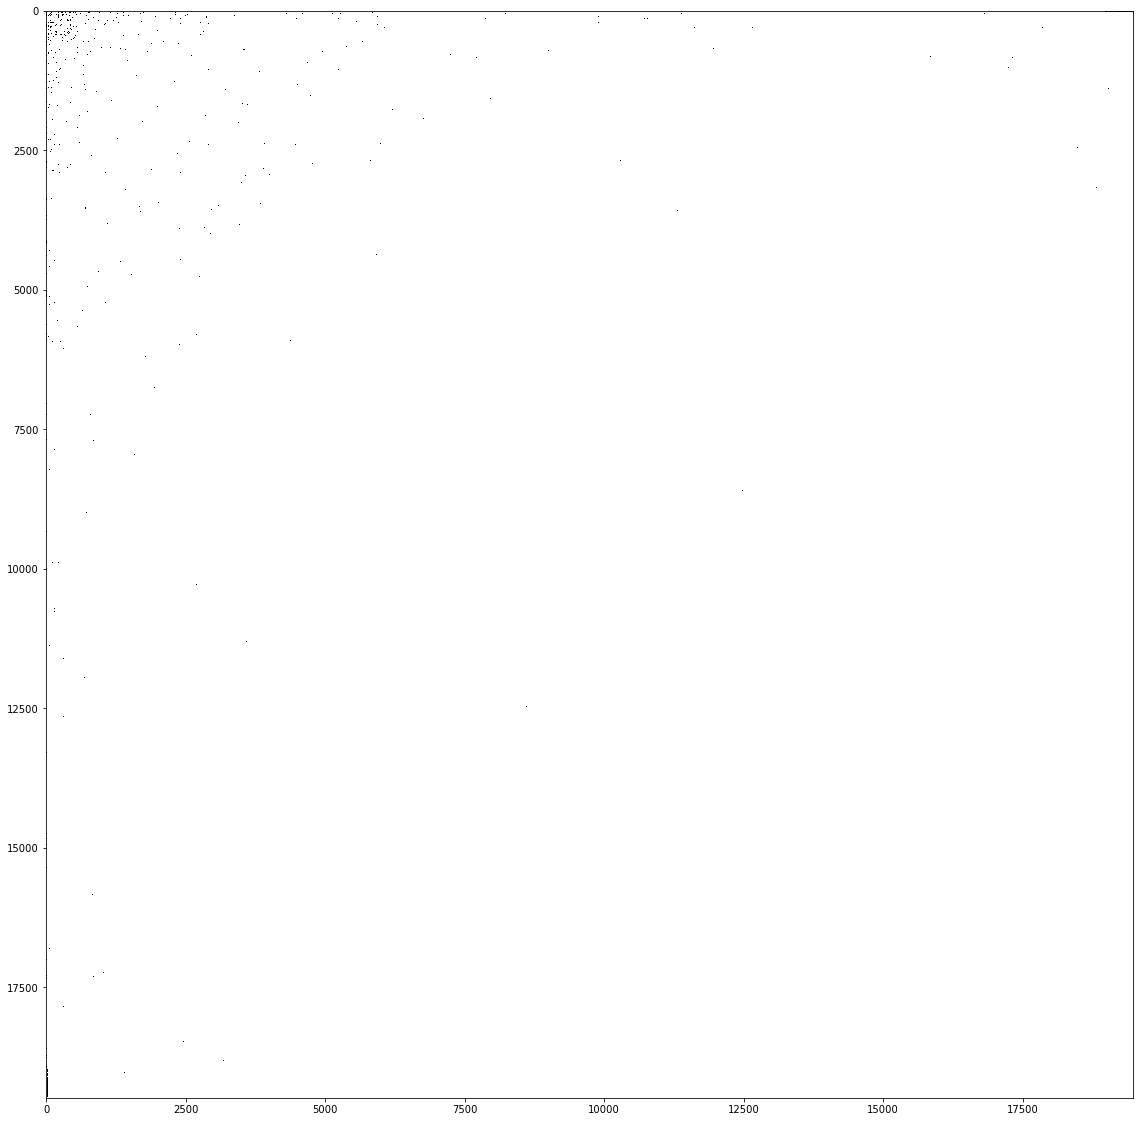

In [796]:
draw_adjacency_matrix(G,nodenewlist)

'2018-01-12','2018-01-25','2018-03-02','2018-03-31','2018-09-21', '2019-01-29','2019-12-20', '2021-01-05','2021-05-24','2021-08-26','2021-11-25'

C:\Users\wyw25\AppData\Local\Temp/ipykernel_20976/1638957180.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


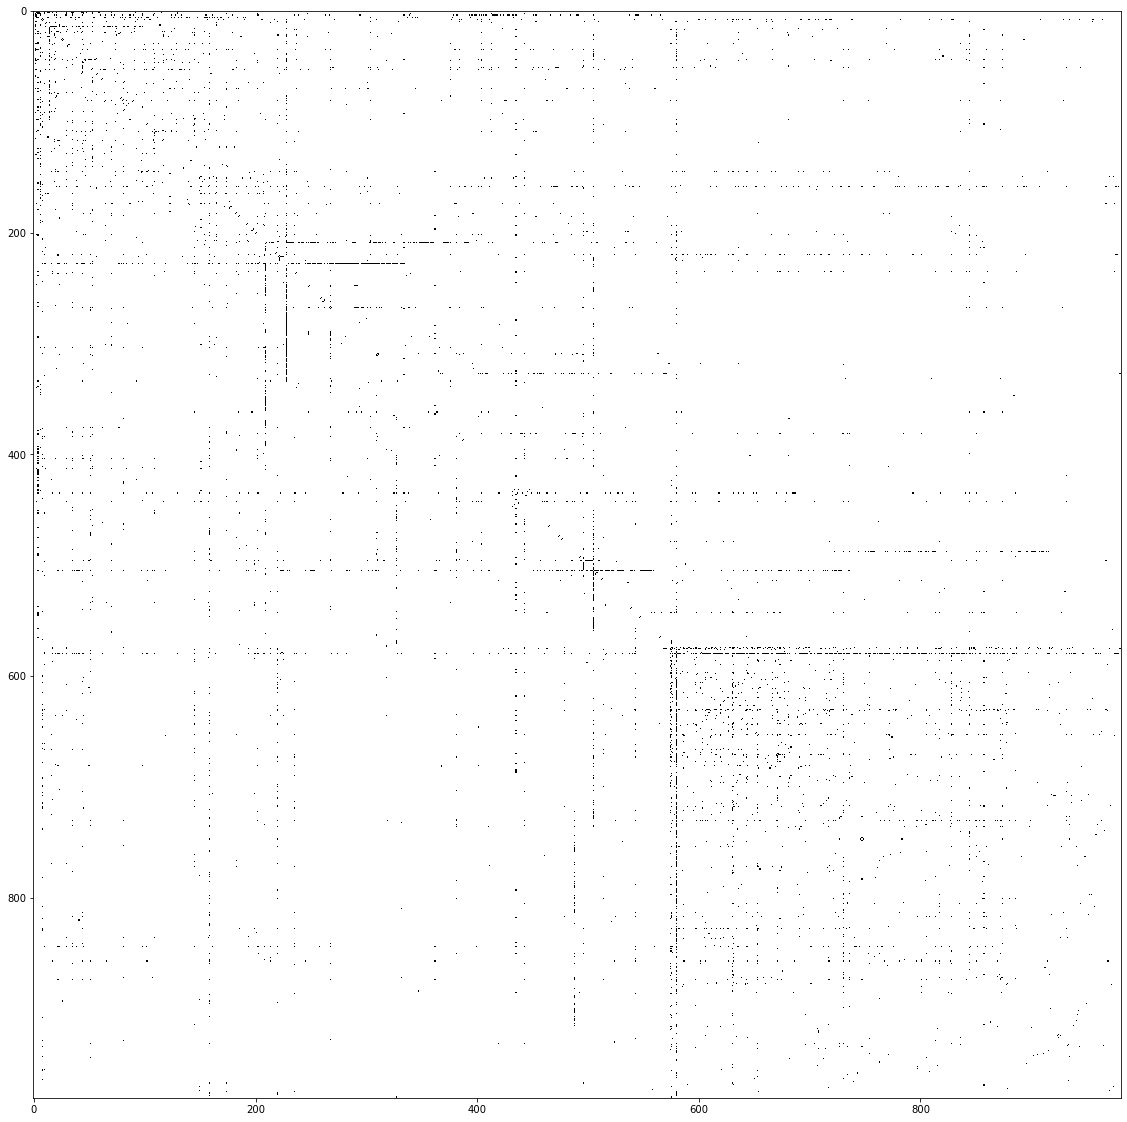

In [802]:
G=Dic_lcc['2018-03-31']
draw_adjacency_matrix(G)

C:\Users\wyw25\AppData\Local\Temp/ipykernel_20976/1638957180.py:13: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  adjacency_matrix = nx.to_numpy_matrix(G, dtype=np.bool, nodelist=node_order)


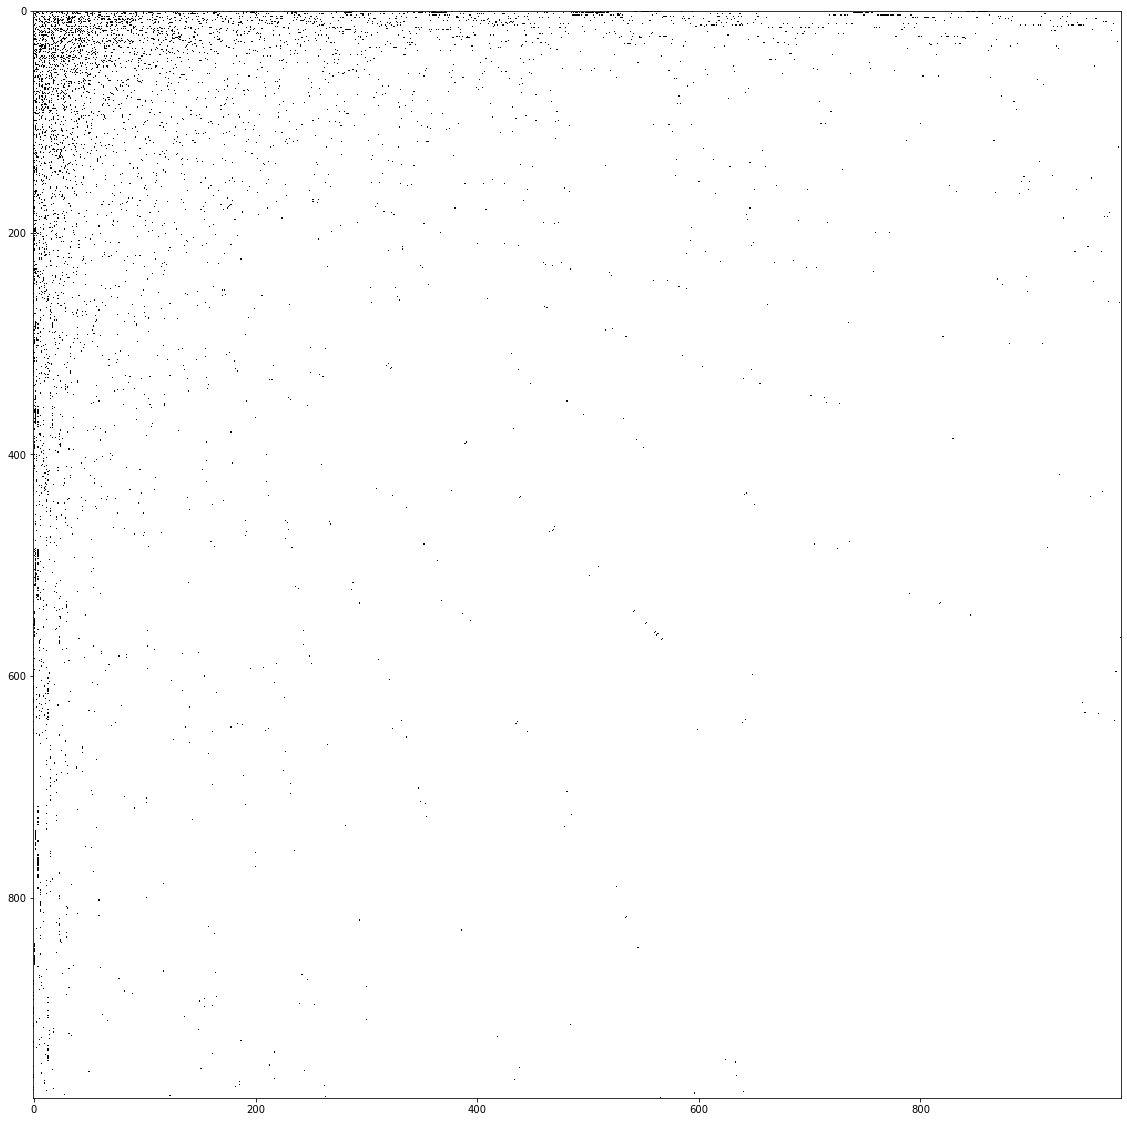

In [803]:
degreeofday=dict(G.degree)
degreeofday_new={k: v for k, v in sorted(degreeofday.items(), key=lambda item: item[1], reverse=True)}
nodenewlist=list(degreeofday_new.keys())
draw_adjacency_matrix(G,nodenewlist)